# <center style='color:dodgerblue'>Feature to image representation using Matplotlib</center>

# 1. Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea

from sklearn import datasets
from sklearn.manifold import TSNE

# 2. Load sklearn's `digits` dataset

In [2]:
X, y = datasets.load_digits(return_X_y=True, as_frame=True)

In [3]:
X.shape, y.shape

((1797, 64), (1797,))

In [4]:
np.unique(y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

# 3. Concatenate `X` and `y` in a single dataframe

In [5]:
df = pd.concat([X, y], axis=1)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [6]:
df.shape

(1797, 65)

# 4. Select a shorter dataframe

In [7]:
shorter_df = []

for i in range(10):
    select = df[df.target==i][:5]
    shorter_df.append(select)
new_df = pd.concat(shorter_df, ignore_index=True)
new_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,1.0,9.0,15.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,10.0,13.0,3.0,0.0,0.0,0
2,0.0,0.0,3.0,13.0,11.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,12.0,13.0,4.0,0.0,0.0,0
3,0.0,0.0,10.0,14.0,11.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,11.0,16.0,12.0,3.0,0.0,0.0,0
4,0.0,0.0,6.0,14.0,10.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,16.0,11.0,1.0,0.0,0.0,0


In [8]:
new_df.shape

(50, 65)

# 5. Separate features and classes from the shorter dataframe

In [9]:
features = new_df.iloc[:, :-1]
classes = new_df.loc[:, 'target']

In [10]:
features.shape, classes.shape

((50, 64), (50,))

In [11]:
np.unique(classes, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([5, 5, 5, 5, 5, 5, 5, 5, 5, 5]))

# 6. Apply `t-SNE`

In [12]:
coords = TSNE(n_components=2, random_state=1).fit_transform(features)
coords.shape

(50, 2)

# 7. Feature to image representation

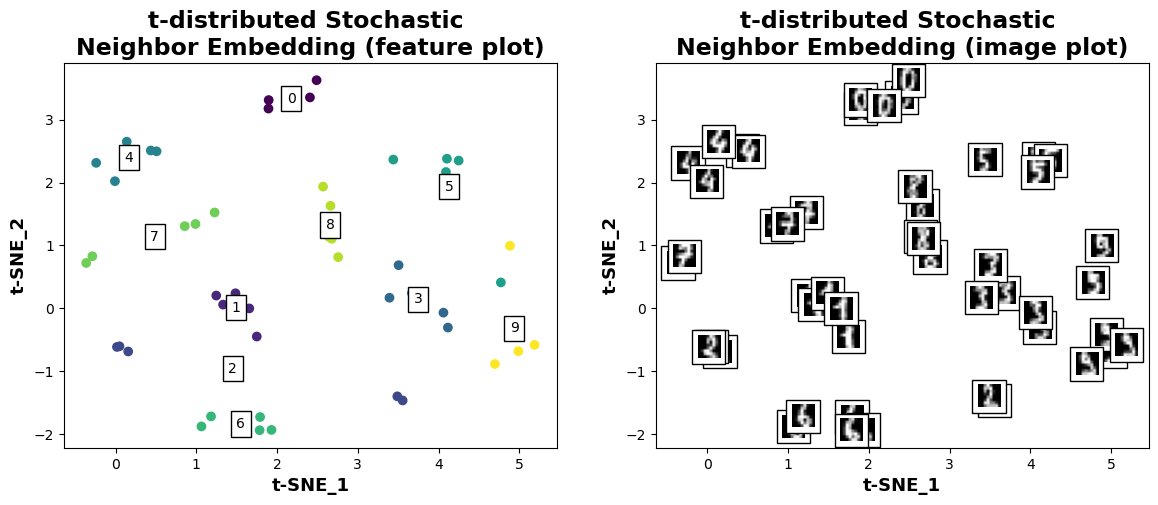

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

ax[0].scatter(coords[:, 0], coords[:, 1], c=classes)
ax[0].set_xlabel('t-SNE_1', fontsize=13, fontweight='bold')
ax[0].set_ylabel('t-SNE_2', fontsize=13, fontweight='bold')
ax[0].set_title('t-distributed Stochastic \nNeighbor Embedding (feature plot)', fontsize=17, fontweight='bold')

for i in range(10):
    class_center = np.mean(coords[classes == i], axis=0)
    text = TextArea('{}'.format(i))
    ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
    ax[0].add_artist(ab)

for image, (p, q) in zip(features.values, coords):
    im = OffsetImage(image.reshape(8, 8), zoom=2, cmap='gray')
    ab = AnnotationBbox(im, (p, q), xycoords='data', frameon=True)
    ax[1].add_artist(ab)
ax[1].update_datalim(coords)
ax[1].autoscale()
ax[1].set_xlabel('t-SNE_1', fontsize=13, fontweight='bold')
ax[1].set_ylabel('t-SNE_2', fontsize=13, fontweight='bold')
ax[1].set_title('t-distributed Stochastic \nNeighbor Embedding (image plot)', fontsize=17, fontweight='bold');